In [153]:
# Drew Lesh
# 11/08/25
# IBM Data Analyst Capstone Project - Data Visualization
# Box Plots

In [154]:
# download database
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-11-18 23:30:19--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M   124MB/s    in 1.6s    

2025-11-18 23:30:21 (124 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# connect to database
conn = sqlite3.connect('survey-results-public.sqlite')


In [159]:
## DEMO: Basic SQL Queries

# 1. Count the Number of Rows in the Table
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)

   COUNT(*)
0     65437


In [160]:
# 2. List all Tables
QUERY = """
SELECT name as Table_Name
FROM sqlite_master
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


In [161]:
# 3. Group Data by Age
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


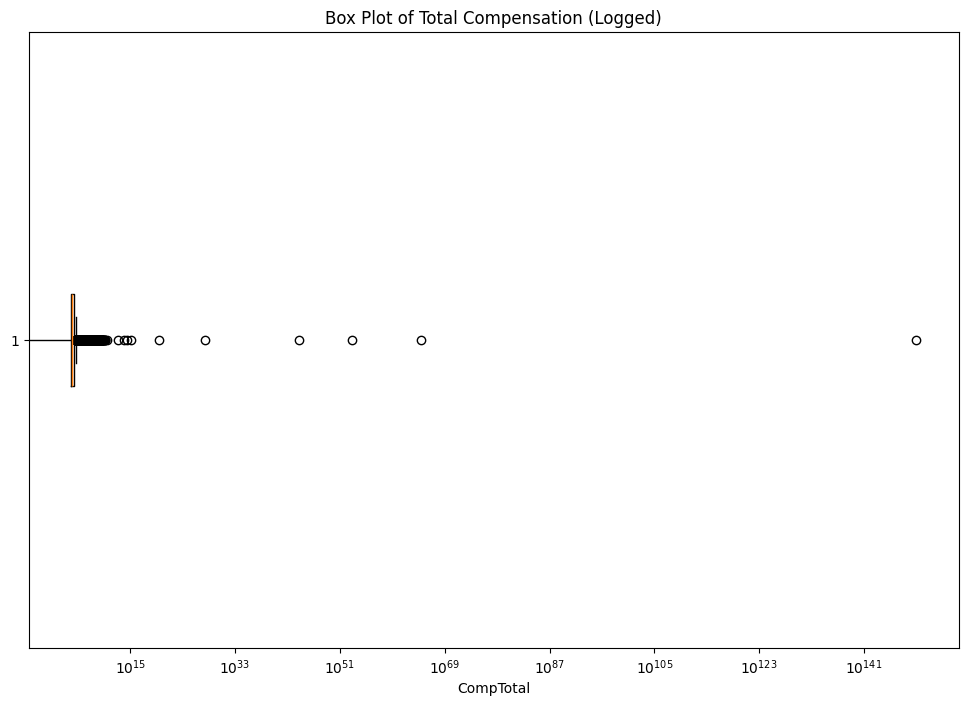

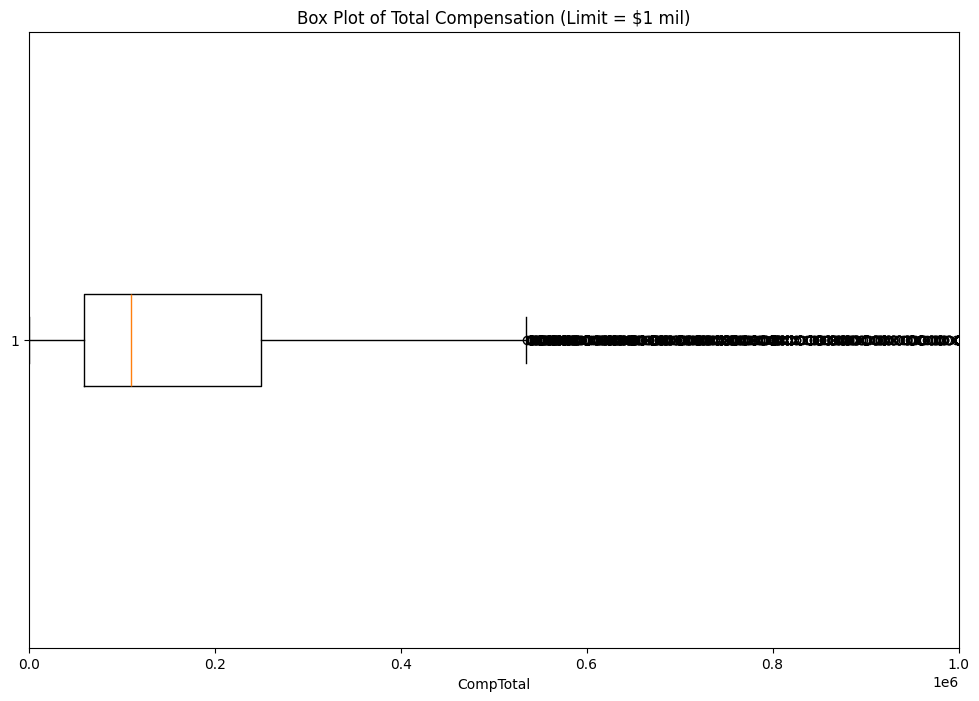

In [162]:
## Visualizing the Distribution of Data
# Box Plot of Total Compensation

# 1. Query Data, Store in DataFrame
QUERY = "SELECT CompTotal FROM main"
compTotal_df = pd.read_sql_query(QUERY, conn)

# 2. Drop NaN (over 30,000 rows so don't replace with mean)
# df_1.isna().sum()
compTotal_df = compTotal_df.dropna()

# 3. Visualize with Box Plot
plt.figure(figsize=(12,8))
plt.boxplot(compTotal_df['CompTotal'], vert=False)
plt.title('Box Plot of Total Compensation (Logged)')
plt.xlabel("CompTotal")
#plt.xlim(0, 300000)
plt.xscale('log')
plt.show()

# 4. Visualize with Box Plot 2
plt.figure(figsize=(12,8))
plt.boxplot(compTotal_df['CompTotal'], vert=False)
plt.title('Box Plot of Total Compensation (Limit = $1 mil)')
plt.xlabel("CompTotal")
plt.xlim(0, 1000000)
#plt.xscale('log')
plt.show()


                  Age  AgeNumeric
0  Under 18 years old        16.0
1     35-44 years old        39.5
2     45-54 years old        49.5
3     18-24 years old        21.0
4     18-24 years old        21.0


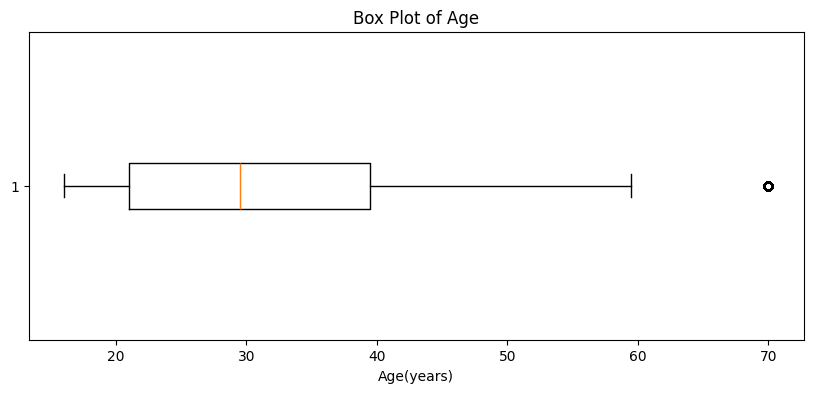

In [164]:
# Box Plot of Age ( converted to numeric )
# 1. Query Data and Store in a DataFrame
QUERY = 'SELECT Age FROM main'
age_df = pd.read_sql_query(QUERY, conn)

# 2. Map Age Data to Numerical values
#age_df.value_counts()
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None,
}

age_df['AgeNumeric'] = age_df['Age'].map(age_map)
age_df = age_df.dropna(subset=['AgeNumeric'])

print(age_df.head())

# 3. Visualize Ages with a Box Plot
plt.figure(figsize=(10,4))
plt.boxplot(age_df['AgeNumeric'], vert=False)
plt.title('Box Plot of Age')
plt.xlabel('Age(years)')
plt.show()

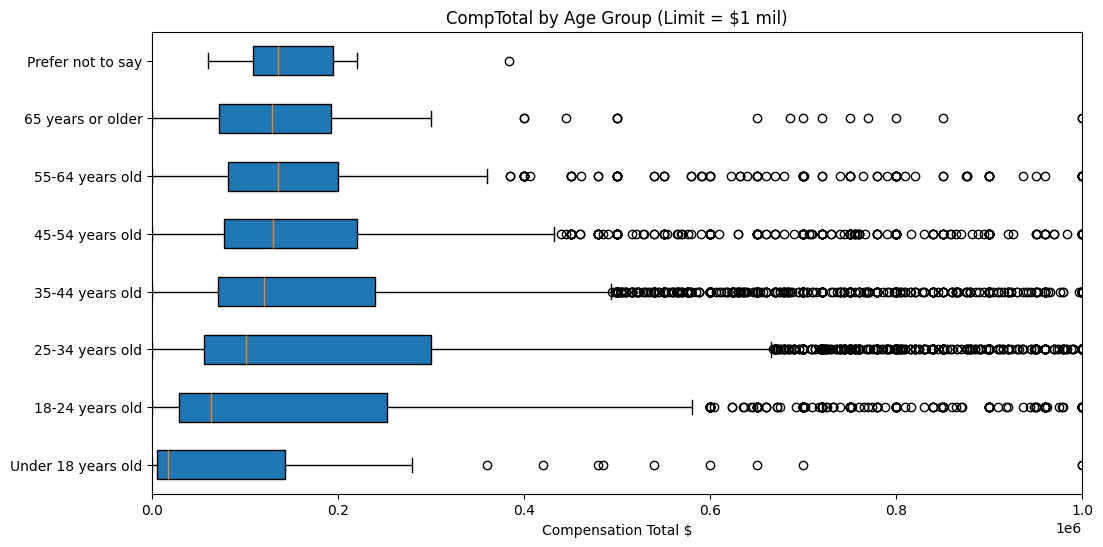

In [165]:
## Visualizing Relationships in the Data
# Box Plot of Total Compensation Grouped by Age Groups:

# 1. Query / Store Data in DF
QUERY = '''
SELECT Age, CompTotal
FROM main
WHERE CompTotal IS NOT NULL
'''

df_2 = pd.read_sql_query(QUERY, conn)

# 2. Map age order
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

df_2['Age'] = pd.Categorical(df_2['Age'], categories=age_order, ordered=True)
#print(df_2.isna().sum())
#print(df_2.head())

# 3. Prep data for each age group
df_2_plot = [df_2[df_2['Age'] == age]['CompTotal'] for age in age_order]

plt.figure(figsize=(12,6))
plt.boxplot(df_2_plot, tick_labels=age_order, vert=False, patch_artist=True)
plt.title('CompTotal by Age Group (Limit = $1 mil)')
plt.xlabel('Compensation Total $')
plt.xlim(0, 1000000)
plt.show()

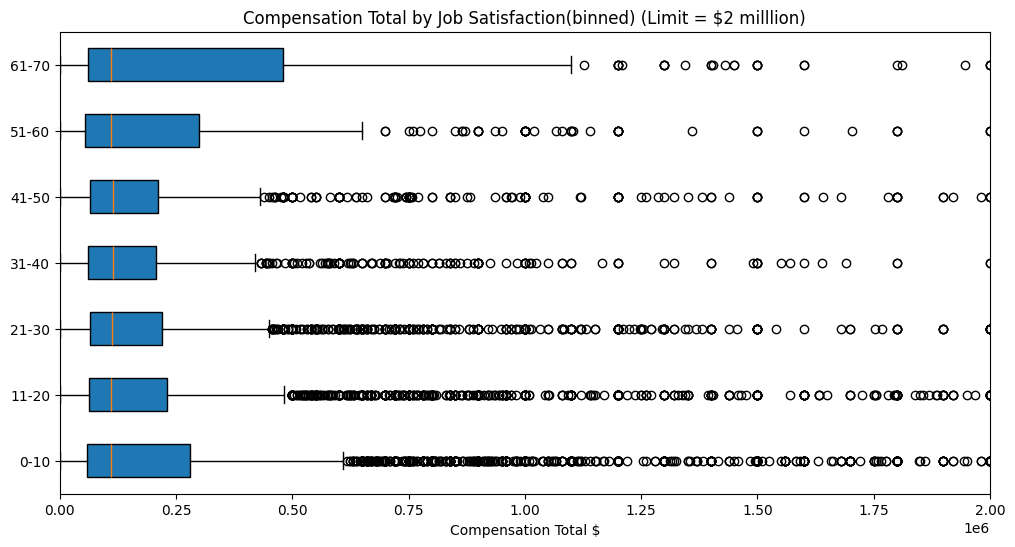

In [166]:
# Box Plot of Total Compensation Grouped by Job Satisfaction

# 1. Query/Store data
QUERY = "SELECT CompTotal, JobSatPoints_6 FROM main"
df_2_2 = pd.read_sql_query(QUERY, conn)
#print('Missing', df_2_2.isna().sum())
#print('Data Types', df_2_2.dtypes)
#print('Head', df_2_2.head())
df_2_2 = df_2_2[['CompTotal', 'JobSatPoints_6']].dropna()

# 2. Prep Data for Plotting
#print(df_2_2['JobSatPoints_6'].value_counts())
    ### Bin JobSatPoints_6 ###
bins = [0, 10, 20, 30, 40, 50, 60, 70]
labels = ["0-10","11-20","21-30","31-40","41-50","51-60","61-70"]
df_2_2['JobSatBin'] = pd.cut(df_2_2['JobSatPoints_6'], bins = bins, labels=labels, include_lowest=True)

    ### Create list of series, one per bin ###
    ### plt.boxplot() expects this when plotting multiple boxes side by side ###
df_2_2_plot = [df_2_2[df_2_2['JobSatBin'] == label]['CompTotal'] for label in labels]

# 3. Plot Data with Box Plot
plt.figure(figsize=(12,6))
plt.boxplot(df_2_2_plot, tick_labels=labels, vert=False, patch_artist=True)
plt.title('Compensation Total by Job Satisfaction(binned) (Limit = $2 milllion)')
plt.xlabel('Compensation Total $')
plt.xlim(0, 2000000)
plt.show()


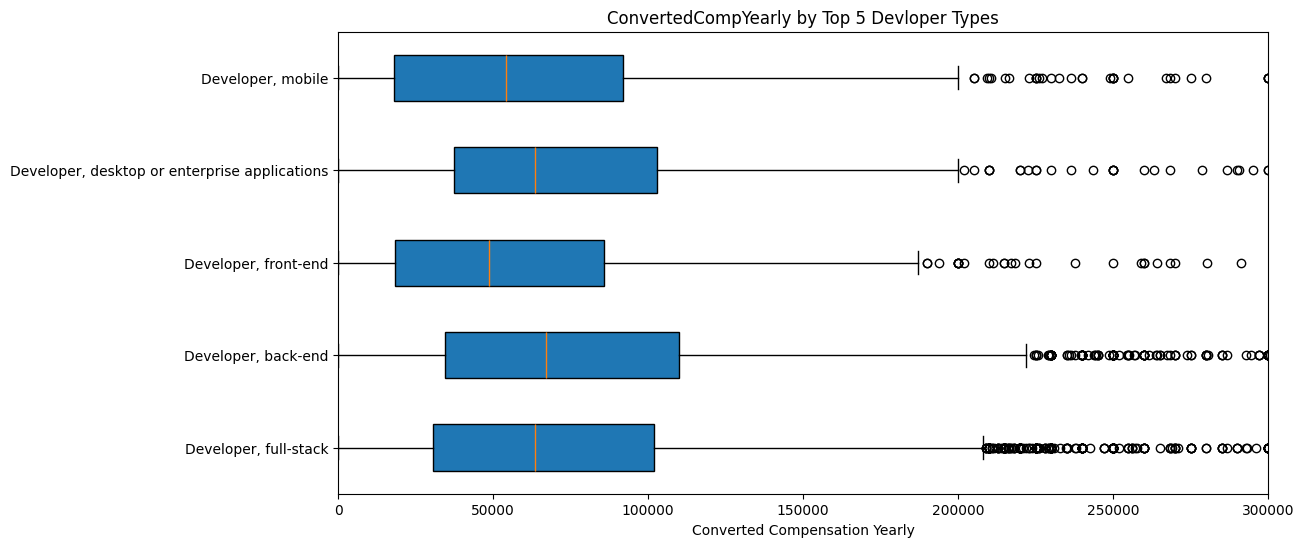

In [167]:
## Visualizing the Composition of the Data
# Box Plot of ConvertedCompYearly for the Top 5 Developer Types:

# 1. Query / Store Data, Correct NaN values
QUERY = 'SELECT DevType, ConvertedCompYearly FROM main'
df_3 = pd.read_sql_query(QUERY, conn)
df_3 = df_3.dropna(subset=['ConvertedCompYearly'])
df_3['DevType'] = df_3['DevType'].fillna(df_3['DevType'].mode()[0])
#print(df_3.isna().sum())
#print(df_3.head())
#print(df_3['DevType'].value_counts())

# 2. Find top 5 developer types
top5_dev = df_3['DevType'].value_counts().nlargest(5).index.tolist()

# 3. Filter Dataframe for top 5
df_3_top5 = df_3[df_3['DevType'].isin(top5_dev)]

# 4. Prep data for box plot
df_3_plot = [df_3_top5[df_3_top5['DevType'] == dev]['ConvertedCompYearly'] for dev in top5_dev]

# 5. Box Plot
plt.figure(figsize=(12,6))
plt.boxplot(df_3_plot, tick_labels=top5_dev, vert=False, patch_artist=True)
plt.title('ConvertedCompYearly by Top 5 Devloper Types')
plt.xlabel('Converted Compensation Yearly')
plt.xlim(0, 300000)
plt.show()

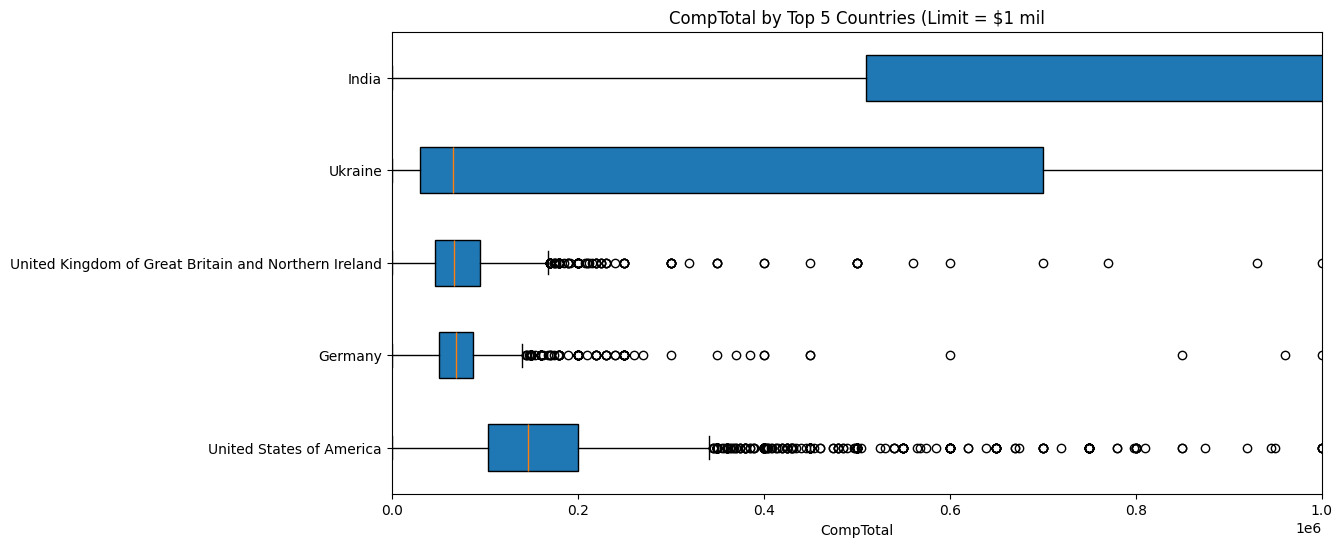

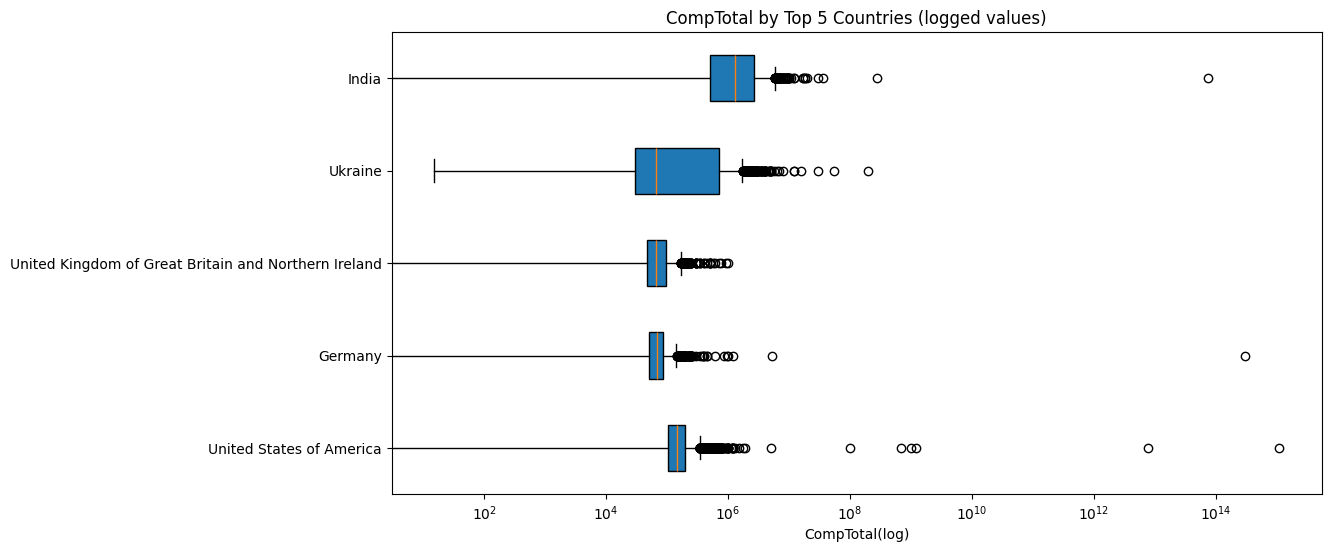

In [169]:
# Box Plot of CompTotal for the Top 5 Countries:

# 1. Query / Store Data and Drop NaN from CompTotal
QUERY = 'SELECT CompTotal, Country FROM main'
df_3_2 = pd.read_sql_query(QUERY, conn)
df_3_2 = df_3_2.dropna(subset=['CompTotal'])

# 2. Find top 5 countries with most responses
top5_countries = df_3_2['Country'].value_counts().nlargest(5).index.tolist()

# 3. Filter a Dataframe for top 5
df_3_2_top5 = df_3_2[df_3_2['Country'].isin(top5_countries)]

# 4. Prep data for box plot
df_3_2_plot = [df_3_2_top5[df_3_2_top5['Country'] == country]['CompTotal'] for country in top5_countries]

# 5. Box Plot
plt.figure(figsize=(12,6))
plt.boxplot(df_3_2_plot, tick_labels=top5_countries, vert=False, patch_artist=True)
plt.title('CompTotal by Top 5 Countries (Limit = $1 mil')
plt.xlabel('CompTotal')
plt.xlim(0, 1000000)
plt.show()

# 5. Box Plot
plt.figure(figsize=(12,6))
plt.boxplot(df_3_2_plot, tick_labels=top5_countries, vert=False, patch_artist=True)
plt.title('CompTotal by Top 5 Countries (logged values)')
plt.xlabel('CompTotal(log)')
plt.xscale('log')
plt.show()

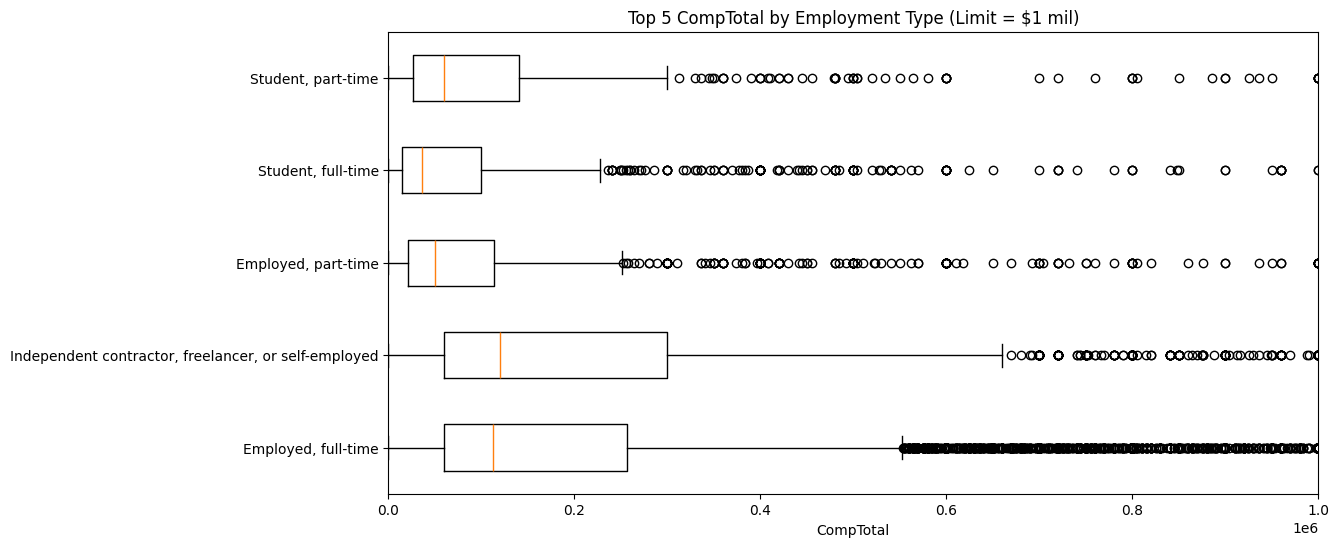

In [170]:
## Visualizing Comparison of Data
# Box Plot of CompTotal Across Employment Types:

# 1. Query data
QUERY = 'SELECT Employment, CompTotal FROM main'
df_4 = pd.read_sql_query(QUERY, conn)
df_4 = df_4.dropna(subset=['CompTotal'])

# 2. Split on semicolon and explode into multiple rows
df_4['Employment'] = df_4['Employment'].str.split(';')
df_4_exploded = df_4.explode('Employment')
df_4_exploded['Employment'] = df_4_exploded['Employment'].str.strip()

# 3. Find top 5 employments
top5_emp = df_4_exploded['Employment'].value_counts().nlargest(5).index.tolist()

# 4. Filter only those employments
df_4_top5 = df_4_exploded[df_4_exploded['Employment'].isin(top5_emp)]

# 5. Prepeare data for plotting
df_4_plot = [df_4_top5[df_4_top5['Employment'] == emp]['CompTotal'] for emp in top5_emp]

# 6. Boxplot
plt.figure(figsize=(12,6))
plt.boxplot(df_4_plot, tick_labels=top5_emp, vert=False)
plt.title('Top 5 CompTotal by Employment Type (Limit = $1 mil)')
plt.xlabel('CompTotal')
plt.xlim(0, 1000000)
plt.show()

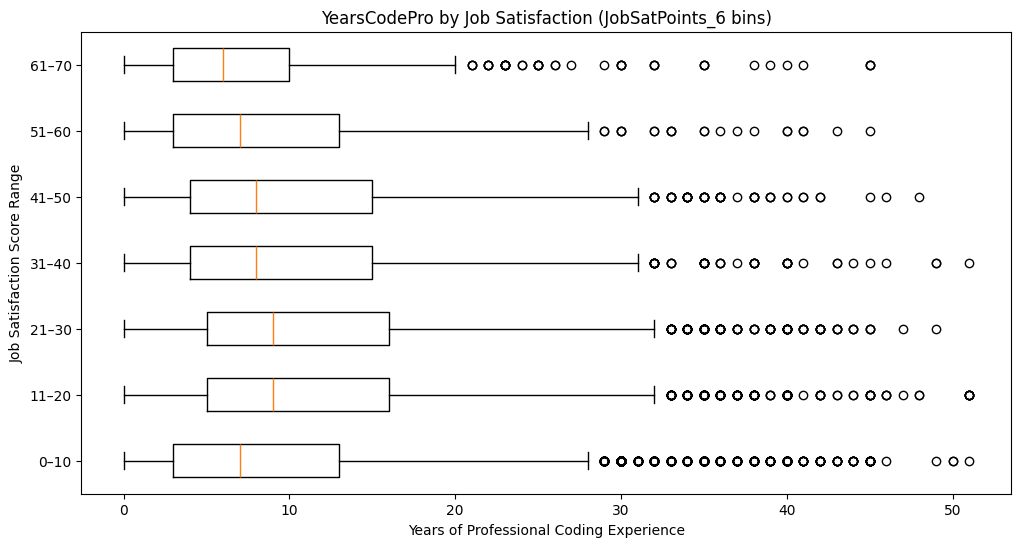

In [171]:
# Examine the distribution of years professionally coding by job satisfaction 6 levels.

# 1. QUery/ store data
QUERY = 'SELECT YearsCodePro, JobSatPoints_6 FROM main'

df_4_2 = pd.read_sql_query(QUERY, conn)
df_4_2 = df_4_2.dropna(subset=['JobSatPoints_6'])
df_4_2['YearsCodePro'] = df_4_2['YearsCodePro'].fillna(df_4_2['YearsCodePro'].mode()[0])

# 2. Prep data for plot

    ## convert YearsCodePro to numeric ##
df_4_2['YearsCodePro'] = df_4_2['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 51
})
df_4_2['YearsCodePro'] = pd.to_numeric(df_4_2['YearsCodePro'], errors='coerce')

    ## bin JobSatPoints_6 ##
bins = [0, 10, 20, 30, 40, 50, 60, 70]
labels = ["0–10","11–20","21–30","31–40","41–50","51–60","61–70"]

df_4_2['JobSatBin'] = pd.cut(
    df_4_2['JobSatPoints_6'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

df_4_2_plot = [
    df_4_2[df_4_2['JobSatBin'] == label]['YearsCodePro'] for label in labels
]

# 3. Plot Data
plt.figure(figsize=(12,6))
plt.boxplot(df_4_2_plot, tick_labels=labels, vert=False)
plt.title('YearsCodePro by Job Satisfaction (JobSatPoints_6 bins)')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score Range')
plt.show()

In [172]:
# Close Database Connection
conn.close()